In [138]:
%load_ext autoreload
%autoreload 2

import numpy as np
from koala import pointsets
from matplotlib import pyplot as plt
from koala import voronization
from koala import plotting
from koala.lattice import Lattice

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


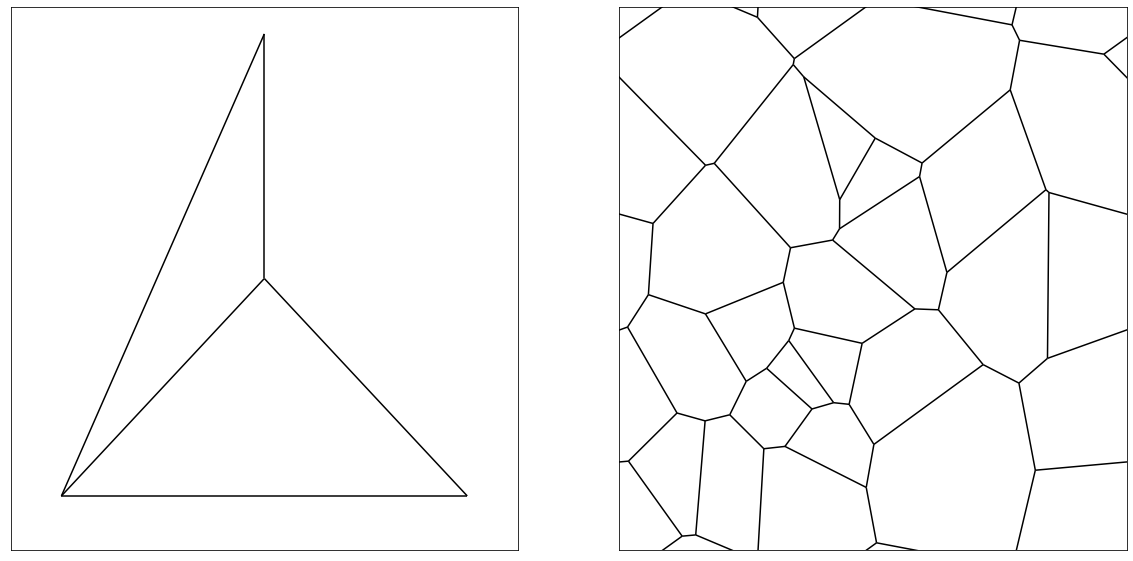

In [139]:
vertices = np.array([
    [0.5,0.5],
    [0.5,0.95],
    [0.1,0.1],
    [0.9,0.1]
])
edge_indices = np.array([
    [0,1],
    [0,2],
    [0,3],
    [1,2],
    [2,3]
])

edge_crossing = np.array([
    [0,0],
    [0,0],
    [0,0],
    [0,0],
    [0,0]
])
simple_lattice = Lattice(vertices,edge_indices,edge_crossing)

centers = pointsets.generate_random(25)
voronoi_lattice = voronization.generate_lattice(centers)

fig1, axes1 = plt.subplots(1,2,figsize = (20,10))
plotting.plot_lattice(simple_lattice, ax= axes1[0])
plotting.plot_lattice(voronoi_lattice, ax= axes1[1])

for ax in axes1.flatten():
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)



3


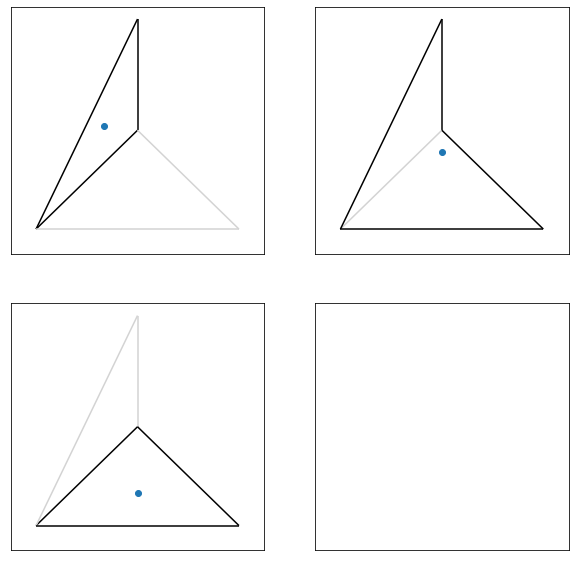

In [143]:
num = len(simple_lattice.plaquettes)
print(num)
size = int(np.ceil(np.sqrt(num)))

fig2, axes2 = plt.subplots(size, size,figsize = (10,10))

for ax in axes2.flatten():
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

for ax, current_plaquette in zip(axes2.flatten(), range(len(simple_lattice.plaquettes))):
    edge_labels = np.zeros_like(simple_lattice.edges.indices[:,0])
    edge_labels[np.array(simple_lattice.plaquettes[current_plaquette].edges)] = 1
    plotting.plot_lattice(simple_lattice, ax,edge_labels,['lightgrey', 'k'])
    ax.scatter(simple_lattice.plaquettes[current_plaquette].center[0],simple_lattice.plaquettes[current_plaquette].center[1])



## Note that the center plotted for the exterior plaquette is wrong!!!

25


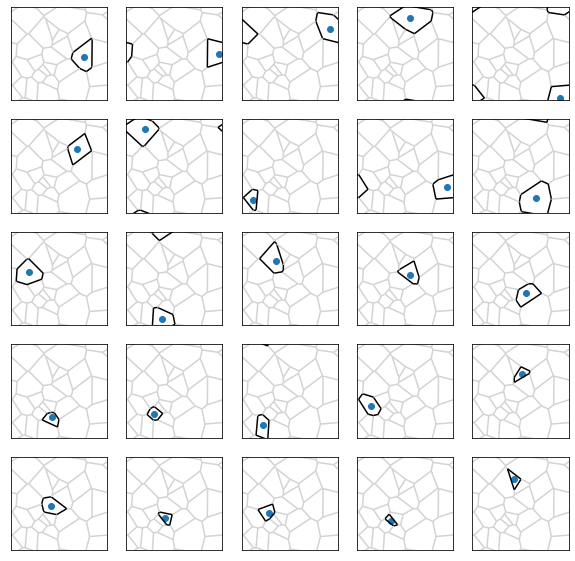

In [142]:
num = len(voronoi_lattice.plaquettes)
print(num)
size = int(np.ceil(np.sqrt(num)))

fig2, axes2 = plt.subplots(size, size,figsize = (10,10))

for ax in axes2.flatten():
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

for ax, current_plaquette in zip(axes2.flatten(), range(len(voronoi_lattice.plaquettes))):
    edge_labels = np.zeros_like(voronoi_lattice.edges.indices[:,0])
    edge_labels[np.array(voronoi_lattice.plaquettes[current_plaquette].edges)] = 1
    plotting.plot_lattice(voronoi_lattice, ax,edge_labels,['lightgrey', 'k'])
    ax.scatter(voronoi_lattice.plaquettes[current_plaquette].center[0],voronoi_lattice.plaquettes[current_plaquette].center[1])

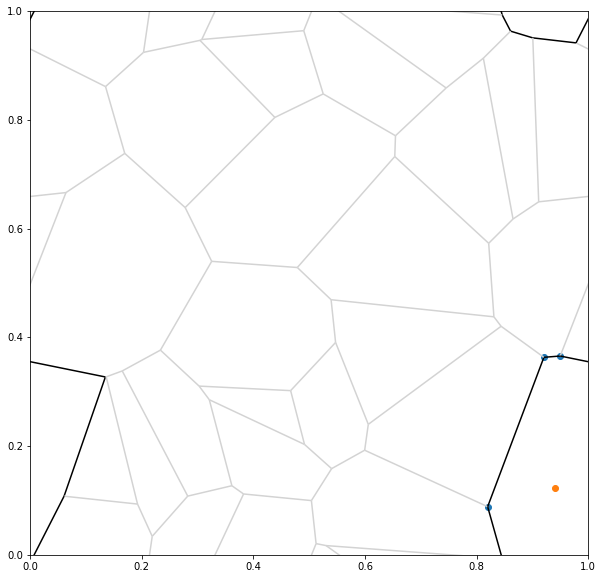

In [135]:
current_plaquette = 10

plaquette_edges = voronoi_lattice.plaquettes[current_plaquette].edges
plaquette_vectors = voronoi_lattice.edges.vectors[plaquette_edges]*(1-2*voronoi_lattice.plaquettes[current_plaquette].directions[:,None])
plaquette_sums = np.cumsum(plaquette_vectors, 0)
points = voronoi_lattice.vertices.positions[voronoi_lattice.plaquettes[current_plaquette].vertices[0]]+plaquette_sums
plaquette_center = np.sum(points, 0) / (points.shape[0])%1



fig3, axes3 = plt.subplots(1,1,figsize = (10,10))
# axes3.axes.xaxis.set_visible(False)
# axes3.axes.yaxis.set_visible(False)

edge_labels = np.zeros_like(voronoi_lattice.edges.indices[:,0])
edge_labels[np.array(voronoi_lattice.plaquettes[current_plaquette].edges)] = 1
plotting.plot_lattice(voronoi_lattice, axes3,edge_labels,['lightgrey', 'k'])
axes3.scatter(points[:,0],points[:,1])
axes3.scatter(plaquette_center[0],plaquette_center[1])